## Praktikum Bersama

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

Import dataset

In [ ]:
# Read the CSV file with a comma delimiter
df_train = pd.read_excel('/content/drive/MyDrive/praktikum_ml/praktikum10/data/kelulusan_train.xls')
df_test = pd.read_excel('/content/drive/MyDrive/praktikum_ml/praktikum10/data/kelulusan_test.xls')

In [ ]:
df_train.head()

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,TERLAMBAT
1,DWI HESTYNA PRIHASTANTY,PEREMPUAN,MAHASISWA,32,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,TERLAMBAT
2,MURYA ARIEF BASUKI,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,TERLAMBAT
3,NANIK SUSANTI,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,TERLAMBAT
4,RIFKA ISTIQFARINA,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,TERLAMBAT


In [ ]:
df_test.head()

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,UNAMA,LAKI - LAKI,MAHASISWA,24,BELUM MENIKAH,3.17,2.70,3.23,2.41,3.00,2.47,1.75,0.00,2.75,TEPAT
1,LEYLA TRIYANA PRATIWI,PEREMPUAN,MAHASISWA,26,BELUM MENIKAH,3.60,3.50,3.42,2.85,3.31,2.95,2.18,NaN,3.39,TEPAT
2,VERIS SOFIYAN PRAYOGA,LAKI - LAKI,MAHASISWA,29,BELUM MENIKAH,2.67,2.66,2.93,3.14,2.92,2.64,2.88,0.50,2.81,TEPAT
3,ADITYA AKBAR NUGRAHA,LAKI - LAKI,MAHASISWA,27,BELUM MENIKAH,2.48,2.86,2.09,2.55,2.55,2.43,2.55,2.17,2.82,TEPAT
4,ERNA EKA RIYANTI,PEREMPUAN,MAHASISWA,25,BELUM MENIKAH,3.19,3.08,3.31,2.83,3.36,2.73,3.06,0.00,3.09,TEPAT


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAMA              379 non-null    object 
 1   JENIS KELAMIN     379 non-null    object 
 2   STATUS MAHASISWA  379 non-null    object 
 3   UMUR              379 non-null    int64  
 4   STATUS NIKAH      379 non-null    object 
 5   IPS 1             379 non-null    float64
 6   IPS 2             379 non-null    float64
 7   IPS 3             379 non-null    float64
 8   IPS 4             379 non-null    float64
 9   IPS 5             379 non-null    float64
 10  IPS 6             379 non-null    float64
 11  IPS 7             379 non-null    float64
 12  IPS 8             372 non-null    float64
 13  IPK               376 non-null    float64
 14  STATUS KELULUSAN  379 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 44.5+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAMA              145 non-null    object 
 1   JENIS KELAMIN     145 non-null    object 
 2   STATUS MAHASISWA  145 non-null    object 
 3   UMUR              145 non-null    int64  
 4   STATUS NIKAH      145 non-null    object 
 5   IPS 1             145 non-null    float64
 6   IPS 2             145 non-null    float64
 7   IPS 3             145 non-null    float64
 8   IPS 4             145 non-null    float64
 9   IPS 5             145 non-null    float64
 10  IPS 6             145 non-null    float64
 11  IPS 7             145 non-null    float64
 12  IPS 8             141 non-null    float64
 13  IPK               142 non-null    float64
 14  STATUS KELULUSAN  145 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 17.1+ KB


Data Cleaning

In [ ]:
print(df_train['JENIS KELAMIN'].unique())
print(df_train['STATUS MAHASISWA'].unique())
print(df_train['STATUS NIKAH'].unique())
print(df_train['STATUS KELULUSAN' ].unique())

['PEREMPUAN' 'LAKI - LAKI']
['BEKERJA' 'MAHASISWA']
['BELUM MENIKAH' 'MENIKAH']
['TERLAMBAT' 'TEPAT']


In [ ]:
df_train.drop(columns=[ 'STATUS NIKAH'], inplace=True)
df_test.drop(columns=[ 'STATUS NIKAH'], inplace=True)

In [ ]:
replaceements = {
    'JENIS KELAMIN': {'LAKI - LAKI': 1, 'PEREMPUAN':0},
    'STATUS MAHASISWA': {'MAHASISWA': 0, 'BEKERJA':1},
    'STATUS KELULUSAN': {'TERLAMBAT': 1, 'TEPAT':0}
}
df_train = df_train.replace(replaceements, inplace=False)
df_train.head()

/tmp/ipython-input-1350621094.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train = df_train.replace(replaceements, inplace=False)


,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,0,1,28,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,1
1,DWI HESTYNA PRIHASTANTY,0,0,32,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,1
2,MURYA ARIEF BASUKI,0,1,29,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,1
3,NANIK SUSANTI,0,0,27,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,1
4,RIFKA ISTIQFARINA,0,1,29,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,1


In [ ]:
df_test = df_test.replace(replaceements, inplace=False)
df_test.head()

/tmp/ipython-input-951741428.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test = df_test.replace(replaceements, inplace=False)


,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,UNAMA,1,0,24,3.17,2.70,3.23,2.41,3.00,2.47,1.75,0.00,2.75,0
1,LEYLA TRIYANA PRATIWI,0,0,26,3.60,3.50,3.42,2.85,3.31,2.95,2.18,NaN,3.39,0
2,VERIS SOFIYAN PRAYOGA,1,0,29,2.67,2.66,2.93,3.14,2.92,2.64,2.88,0.50,2.81,0
3,ADITYA AKBAR NUGRAHA,1,0,27,2.48,2.86,2.09,2.55,2.55,2.43,2.55,2.17,2.82,0
4,ERNA EKA RIYANTI,0,0,25,3.19,3.08,3.31,2.83,3.36,2.73,3.06,0.00,3.09,0


Cek Missing Value

In [ ]:
df_train.isnull().sum()

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0
IPS 6,0


In [ ]:
df_test.isnull().sum()

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0
IPS 6,0


Menangani Missing Value

In [ ]:
df_train = df_train.dropna(subset=['IPS 8'])
df_train = df_train.dropna(subset=['IPK '])

In [ ]:
df_test = df_test.dropna(subset=['IPS 8'])
df_test = df_test.dropna(subset=['IPK '])

In [ ]:
df_train.isnull().sum()

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0
IPS 6,0


In [ ]:
df_test.isnull().sum()

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0
IPS 6,0


Menghapus Kolom yang Tidak Digunakan dalam Analisis

In [ ]:
#kolom yang akan digunakan untuk korelasi
df_train = df_train.drop(columns=['NAMA'])
df_train.head(1)

,JENIS KELAMIN,STATUS MAHASISWA,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,0,1,28,2.76,2.8,3.2,3.17,2.98,3.0,3.03,0.0,3.07,1


In [ ]:
#kolom yang akan digunakan untuk korelasi
df_test = df_test.drop(columns=['NAMA'])
df_test.head(1)

,JENIS KELAMIN,STATUS MAHASISWA,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,1,0,24,3.17,2.7,3.23,2.41,3.0,2.47,1.75,0.0,2.75,0


Analisis Korelasi Fitur

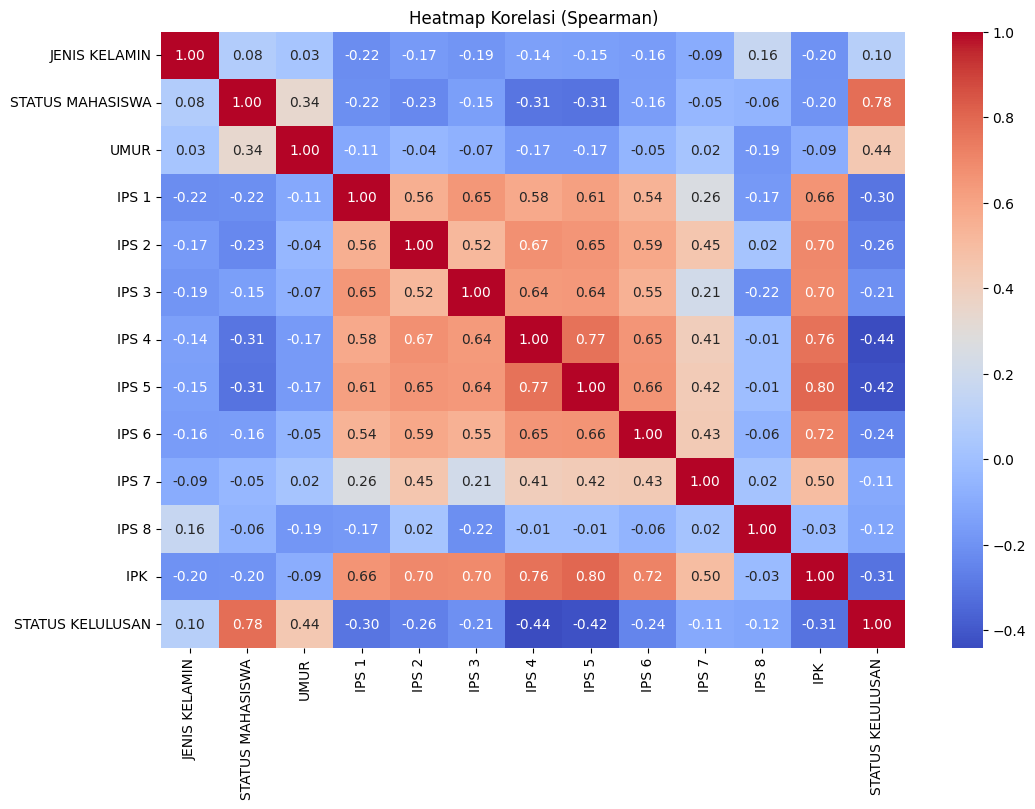

In [ ]:
# Menghitung matriks korelasi menggunakan Spearman
correlation_matrix = df_train.corr(method='spearman' )

# Membuat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap Korelasi (Spearman)")
plt.show()

Visualisasi Distribusi Status Kelulusan

/tmp/ipython-input-3061898075.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='STATUS KELULUSAN', data=df_train, palette='Set2' )


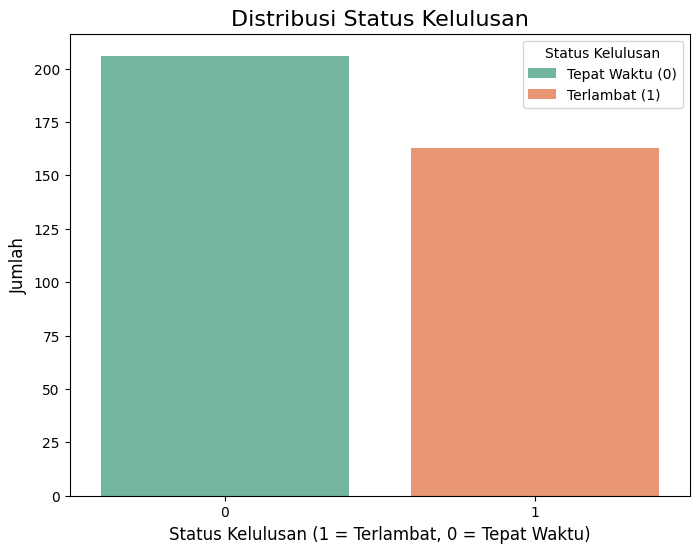

In [ ]:
# Membuat diagram batang untuk status kelulusan
plt.figure(figsize=(8, 6))
sns.countplot(x='STATUS KELULUSAN', data=df_train, palette='Set2' )

# Menambahkan judul dan label
plt.title('Distribusi Status Kelulusan', fontsize=16)
plt.xlabel('Status Kelulusan (1 = Terlambat, 0 = Tepat Waktu)', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Menambahkan legend (adjusted labels for correctness)
plt.legend(title='Status Kelulusan', labels=['Tepat Waktu (0)', 'Terlambat (1)'], loc='upper right' )

# Menampilkan plot
plt.show()

Tahap Modeling

In [ ]:
# data yang dilatih
x_train = df_train.drop(columns=['STATUS KELULUSAN'])
y_train = df_train['STATUS KELULUSAN' ]

# data validasinya
x_test = df_test.drop(columns=['STATUS KELULUSAN' ])
y_test = df_test['STATUS KELULUSAN' ]

# Normalisasi features after splitting
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Menangani Ketidakseimbangan Kelas dengan SMOTE

In [ ]:
print("Before SMOTE:")
print(y_train.value_counts())

sm = SMOTE(random_state=42, k_neighbors=1) # Set k_neighbors to 1
x_train_smote, y_train_smote = sm.fit_resample(x_train_scaled, y_train)

print("After SMOTE:")
print(y_train_smote.value_counts())

Before SMOTE:
STATUS KELULUSAN
0    206
1    163
Name: count, dtype: int64
After SMOTE:
STATUS KELULUSAN
1    206
0    206
Name: count, dtype: int64


Menentukan Parameter Terbaik-Hyperparameter Tuning

In [ ]:
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']

}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs =- 1)
grid.fit(x_train_smote, y_train_smote)

print("Best Params:", grid.best_params_)
print("Best Score (CV):", grid.best_score_)

Best Params: {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
Best Score (CV): 0.9029973552747576


Latih Model KNN Terbaik dan Melakukan Prediks

In [ ]:
best_knn = grid.best_estimator_
best_knn.fit(x_train_smote, y_train_smote)

# Prediksi
y_pred = best_knn.predict(x_test_scaled)

Evaluasi Model dengan Classification Report

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred) )


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00         2

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



Evaluasi dengan Confusion Matrix

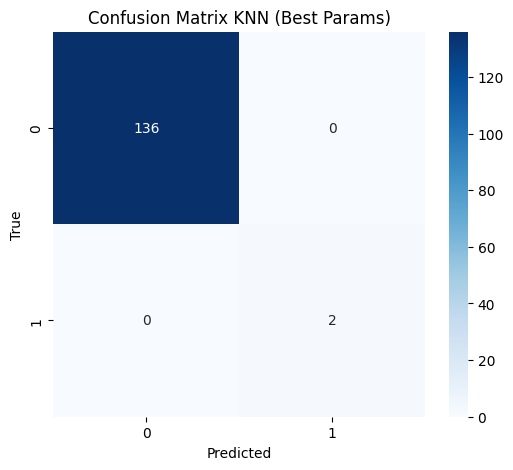

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d' )
plt.title("Confusion Matrix KNN (Best Params)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Validasi Model dengan Cross Validation

In [ ]:
cv_scores = cross_val_score(best_knn, x_train_smote, y_train_smote, cv=5)
print("Cross Validation Accuracy:", cv_scores.mean())
print("Std Dev:", cv_scores.std())

Cross Validation Accuracy: 0.9029973552747576
Std Dev: 0.042371318661662674


Tentukan Nilai K Optimal dengan Elbow Method

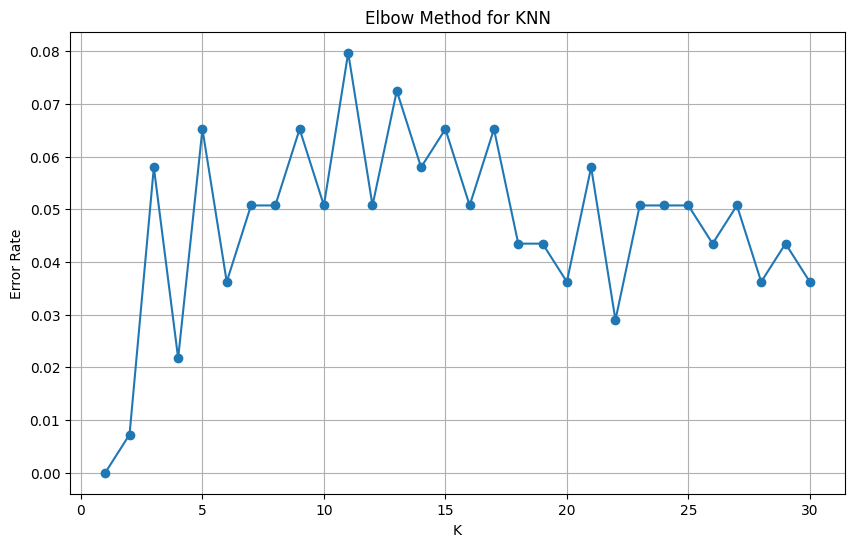

In [ ]:
errors = []

for k in range(1, 31):
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(x_train_smote, y_train_smote)
    pred = knn_temp.predict(x_test_scaled)
    errors.append(np.mean(pred != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,31), errors, marker='o')
plt.title("Elbow Method for KNN")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.grid(True)
plt.show()

## Latihan 1

Import Library

In [22]:
import numpy as np
import pandas as pd

# Machine Learning - Model
from sklearn.neighbors import KNeighborsClassifier

# Machine Learning - Data Preprocessing & Evaluation
from sklearn.model_selection import LeaveOneOut, cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Buat Dataset

In [17]:
import pandas as pd

# Perbaikan: Memastikan setiap key memiliki nilai (list) yang lengkap dan rapi
data = {
    "temperature": [10, 25, 15, 20, 18, 20, 22, 24],
    "wind":        [0, 0, 5, 3, 7, 10, 5, 6],
    "label":       ["Dingin", "Panas", "Dingin", "Panas", "Dingin", "Dingin", "Panas", "Panas"]
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Mencetak DataFrame
print(df)

   temperature  wind   label
0           10     0  Dingin
1           25     0   Panas
2           15     5  Dingin
3           20     3   Panas
4           18     7  Dingin
5           20    10  Dingin
6           22     5   Panas
7           24     6   Panas


In [18]:
# 2. Memisahkan Fitur (X) dan Label (y)
X = df[['temperature', 'wind']]
y = df['label']

In [19]:
# 3. Mendefinisikan Titik Data Baru yang Akan Diprediksi
new_data = pd.DataFrame({'temperature': [16], 'wind': [3]})

In [20]:
# 4. Melakukan Penskalaan (Standard Scaling)
# Standard Scaling (Z-score normalization) mengubah data menjadi mean = 0 dan std deviasi = 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Latih scaler dengan data X
new_data_scaled = scaler.transform(new_data) # Terapkan scaler ke data baru

Mencari Nilai K Terbaik Berdasarkan Akurasi

In [24]:
# Membagi Data Menjadi Training dan Testing Set
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

In [26]:
# 6. Menguji Berbagai Nilai K untuk Menemukan Akurasi Terbaik
k_values = [1, 3, 5]
best_k = 0
best_accuracy = 0

print("=== Mencari Nilai K Terbaik ===")
for k in k_values:
    # Inisialisasi model K-NN
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # Melatih model
    knn_model.fit(X_train, y_train)

    # Melakukan prediksi pada data uji
    y_pred = knn_model.predict(X_test)

    # Menghitung akurasi
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Nilai K = {k}: Akurasi = {accuracy*100:.2f}%")

    # Memperbarui nilai K terbaik
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"\nKesimpulan: Nilai K terbaik berdasarkan akurasi pada data uji adalah K = **{best_k}** dengan akurasi **{best_accuracy*100:.2f}%**.")

=== Mencari Nilai K Terbaik ===
Nilai K = 1: Akurasi = 100.00%
Nilai K = 3: Akurasi = 100.00%
Nilai K = 5: Akurasi = 33.33%

Kesimpulan: Nilai K terbaik berdasarkan akurasi pada data uji adalah K = **1** dengan akurasi **100.00%**.


Prediksi Persepsi Marry

In [27]:
# Melatih Model K-NN Akhir dengan Nilai K Terbaik (Best_k) dengan SEMUA data yang sudah di-scale (X_scaled)
final_knn_model = KNeighborsClassifier(n_neighbors=best_k)
final_knn_model.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=1)

In [28]:
# Melakukan Prediksi untuk Data Baru Titik data baru yang sudah di-scale: 16C dan 3 km/jam
marry_perception = final_knn_model.predict(new_data_scaled)

print("\n--- Hasil Prediksi ---")
print(f"Data Baru (Temperatur: 16°C, Angin: 3 km/jam)")
print(f"Persepsi Marry (menggunakan K={best_k}) adalah: **{marry_perception[0]}**")


--- Hasil Prediksi ---
Data Baru (Temperatur: 16°C, Angin: 3 km/jam)
Persepsi Marry (menggunakan K=1) adalah: **Dingin**


Visualisasi

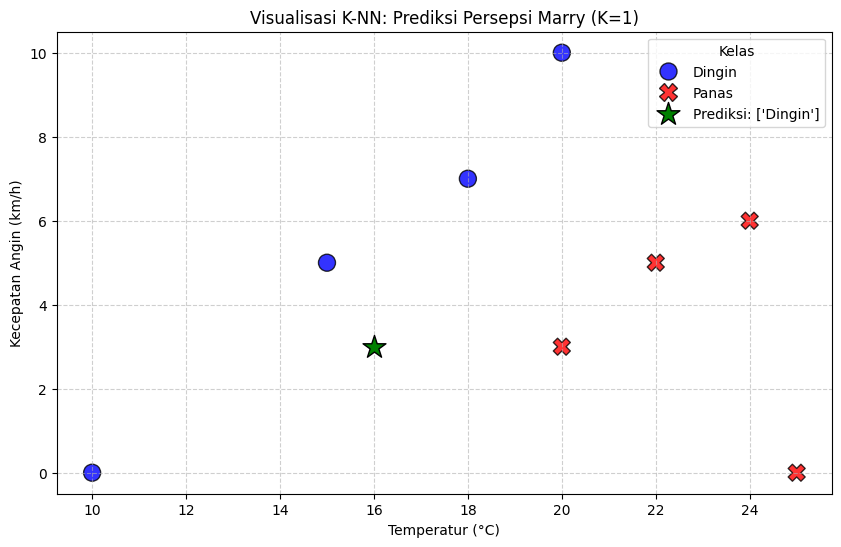

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Membuat Plot
plt.figure(figsize=(10, 6))

# 2. Scatter plot data latih
# Menggunakan kolom 'label' untuk menentukan warna
sns.scatterplot(
    x=df['temperature'],
    y=df['wind'],
    hue=df['label'],
    style=df['label'],
    s=150, # Ukuran titik
    palette={'Panas': 'red', 'Dingin': 'blue'},
    edgecolor='k',
    alpha=0.8
)

# 3. Menambahkan Titik Data Baru
plt.scatter(
    new_data['temperature'],
    new_data['wind'],
    marker='*', # Gunakan bintang untuk data baru
    s=300,
    color='green',
    edgecolor='k',
    label=f'Prediksi: {marry_perception}',
    zorder=5 # Pastikan di atas layer lain
)

# 4. Label dan Judul
plt.title(f'Visualisasi K-NN: Prediksi Persepsi Marry (K={best_k})')
plt.xlabel('Temperatur (°C)')
plt.ylabel('Kecepatan Angin (km/h)')
plt.legend(title='Kelas')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Latihan 2

In [33]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Data dari studi kasus
nim = ["TI001", "TI002", "TI003", "TI004", "TI005", "TI006", "TI007", "TI008", "TI009", "TI010"]
hasil_sebenarnya = [
    "Lulus", "Lulus", "Lulus", "Lulus", "Lulus",
    "Tidak Lulus", "Tidak Lulus", "Tidak Lulus", "Tidak Lulus", "Tidak Lulus"
]
hasil_prediksi = [
    "Lulus", "Lulus", "Lulus", "Tidak Lulus", "Tidak Lulus",
    "Lulus", "Tidak Lulus", "Tidak Lulus", "Tidak Lulus", "Tidak Lulus"
]

# Membuat DataFrame (Tabel Input)
data = {
    'Nim': nim,
    'Hasil Sebenarnya': hasil_sebenarnya,
    'Hasil Prediksi': hasil_prediksi
}
df_input = pd.DataFrame(data)

print("=== Tabel Data Input (Hasil Sebenarnya vs. Prediksi) ===")
print(df_input.to_markdown(index=False))
print("-" * 50)

=== Tabel Data Input (Hasil Sebenarnya vs. Prediksi) ===
| Nim   | Hasil Sebenarnya   | Hasil Prediksi   |
|:------|:-------------------|:-----------------|
| TI001 | Lulus              | Lulus            |
| TI002 | Lulus              | Lulus            |
| TI003 | Lulus              | Lulus            |
| TI004 | Lulus              | Tidak Lulus      |
| TI005 | Lulus              | Tidak Lulus      |
| TI006 | Tidak Lulus        | Lulus            |
| TI007 | Tidak Lulus        | Tidak Lulus      |
| TI008 | Tidak Lulus        | Tidak Lulus      |
| TI009 | Tidak Lulus        | Tidak Lulus      |
| TI010 | Tidak Lulus        | Tidak Lulus      |
--------------------------------------------------


Buat Tabel Confusion Matrix

In [39]:
# --- 1. MEMBUAT CONFUSION MATRIX ---
print("1. Confusion Matrix (Tabel)")

# Hitung Confusion Matrix
cm = confusion_matrix(hasil_sebenarnya, hasil_prediksi, labels=labels)

# Buat DataFrame
df_cm = pd.DataFrame(
    cm,
    index=[f'Sebenarnya: {i}' for i in labels],
    columns=[f'Prediksi: {i}' for i in labels]
)

print(df_cm.to_markdown())

# Ambil nilai TP, FN, FP, TN untuk referensi
TP = cm[0, 0]
FN = cm[0, 1]
FP = cm[1, 0]
TN = cm[1, 1]

print(f"\nTP (Lulus | Lulus) = {TP}")
print(f"FP (T.Lulus | Lulus) = {FP}")
print(f"FN (Lulus | T.Lulus) = {FN}")
print(f"TN (T.Lulus | T.Lulus) = {TN}")
print("=" * 50)

1. Confusion Matrix (Tabel)
|                         |   Prediksi: Lulus |   Prediksi: Tidak Lulus |
|:------------------------|------------------:|------------------------:|
| Sebenarnya: Lulus       |                 3 |                       2 |
| Sebenarnya: Tidak Lulus |                 1 |                       4 |

TP (Lulus | Lulus) = 3
FP (T.Lulus | Lulus) = 1
FN (Lulus | T.Lulus) = 2
TN (T.Lulus | T.Lulus) = 4


In [41]:
# 2. MENGHITUNG METRIK EVALUASI
print("2. Hasil Perhitungan Metrik")

# Hitung metrik
accuracy = accuracy_score(hasil_sebenarnya, hasil_prediksi)
# pos_label="Lulus" digunakan karena "Lulus" adalah kelas yang kita anggap Positif
precision = precision_score(hasil_sebenarnya, hasil_prediksi, pos_label="Lulus")
recall = recall_score(hasil_sebenarnya, hasil_prediksi, pos_label="Lulus")

print(f"Accuracy : {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall   : {recall:.4f} ({recall*100:.2f}%)")
print("=" * 50)

2. Hasil Perhitungan Metrik
Accuracy : 0.7000 (70.00%)
Precision: 0.7500 (75.00%)
Recall   : 0.6000 (60.00%)


## Latihan 3

Import Library

In [56]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

Import Dataset

In [46]:
# Read the CSV file with a comma delimiter
df = pd.read_csv('/content/drive/MyDrive/praktikum_ml/praktikum10/data/weather_classification_data.csv')
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


Data Cleaning

In [57]:
df.isnull().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


In [58]:
df.duplicated().sum()

np.int64(0)

Encoding Data Kategorikal

In [59]:
label_encoders = {}
for col in ["Cloud Cover", "Season", "Location", "Weather Type"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

Normalisasi Fitur Numerik

In [60]:
scaler = StandardScaler()
X = scaler.fit_transform(df.drop("Weather Type", axis=1))
y = df["Weather Type"]

Split Dataset (Train & Test)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

Training Model KNN

In [62]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Prediksi dan Evaluasi

In [63]:
y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Akurasi: 0.9
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1329
           1       0.86      0.90      0.88      1318
           2       0.94      0.91      0.93      1337
           3       0.93      0.91      0.92      1296

    accuracy                           0.90      5280
   macro avg       0.90      0.90      0.90      5280
weighted avg       0.90      0.90      0.90      5280



Visualisasi

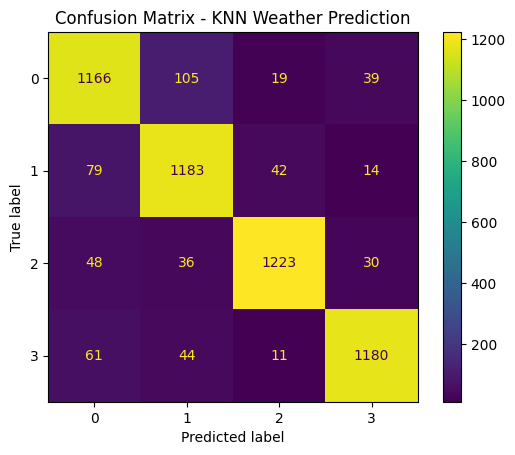

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix - KNN Weather Prediction")
plt.show()
